# Testing RL Libraries

> -

## Setup

In [1]:
import numpy as np
np.random.seed(0)

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

# plt.rcParams['figure.dpi'] = 100
# plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'peachpuff'  # [white, peachpuff, wheat]

## Utils

In [2]:
def plot_convergence(arr, figsize=None, label=None, xlim=None, ylim=None,  title=None, xlabel=None, ylabel=None):
    n = len(arr)
    
    plt.figure(figsize=figsize)
    
    plt.plot(range(1, n + 1), arr, linewidth=1, label=label)
    # plt.plot(range(1, n + 1), arr, 'ro--', linewidth=1, markersize=1, label=label)
    
    # plt.axhline(y=0.05, color='g', linestyle='--', label='Significance Level')
    # plt.axhline(y=0.0, color='r', linestyle='--', label='Convergence')
    
    if xlim: plt.xlim(xlim)
    if ylim: plt.ylim(ylim)
    
    if title: plt.title(title)
    if xlabel: plt.xlabel('Horizon')
    if ylabel: plt.ylabel('Average Updates')
    
    plt.legend()
    # plt.grid(True)
    plt.tight_layout()
    plt.show()

In [3]:
def train(env, model, train_timesteps=10_000, test_timesteps=1000, save_name=None):
    ## Train
    # Using OpenAI Gym
    # # obs, info = env.reset(seed=0)
    # vec_env = model.get_env()
    # obs = model.get_env(seed=0)

    # for i in range(int(1e3)):
    #     action = vec_env.action_space.sample() # this is where you would insert your policy ?
    #     obs, reward, done, truncated, info = vec_env.step(action)

    # VecEnv resets automatically
    # #     if done or truncated:
    # #         obs, info = env.reset()
    
    # Using Stable Baselines
    model.learn(total_timesteps=train_timesteps)

    ## Save
    if save_name:
        model.save(save_name)

    ## Test
    n_episodes = 100
    episode_rewards = []
    episode_lengths = []

    for _ in range(n_episodes):
        vec_env = model.get_env()
        obs = vec_env.reset()
        
        total_rewards = 0
        steps = 0
        
        while True:
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, done, info = vec_env.step(action)
            
            vec_env.render()
            
            total_rewards += reward
            steps += 1
            
            if done:
                # obs = env.reset() # VecEnv resets automatically
                
                episode_rewards.append(total_rewards)
                episode_lengths.append(steps)
                break
    
    env.close()
    
    # Plotting
    plot_convergence(episode_rewards, title='Episode Rewards Convergence', xlabel='Episode', ylabel='Total Reward')
    plot_convergence(episode_lengths, title='Episode Lengths Convergence', xlabel='Episode', ylabel='Length of Episode')
    
    return model

## 1) PPO

In [4]:
# Environment
import gymnasium as gym

env = gym.make("CartPole-v1", render_mode="human")

In [5]:
from stable_baselines3 import PPO

# Initialize the PPO agent
model = PPO("MlpPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.5     |
|    ep_rew_mean     | 21.5     |
| time/              |          |
|    fps             | 46       |
|    iterations      | 1        |
|    time_elapsed    | 43       |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 27         |
|    ep_rew_mean          | 27         |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 2          |
|    time_elapsed         | 88         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00791307 |
|    clip_fraction        | 0.0909     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.686     |
|    explained_variance   | -0.00126   |
|    learning_rate        | 0.0003     |
|   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


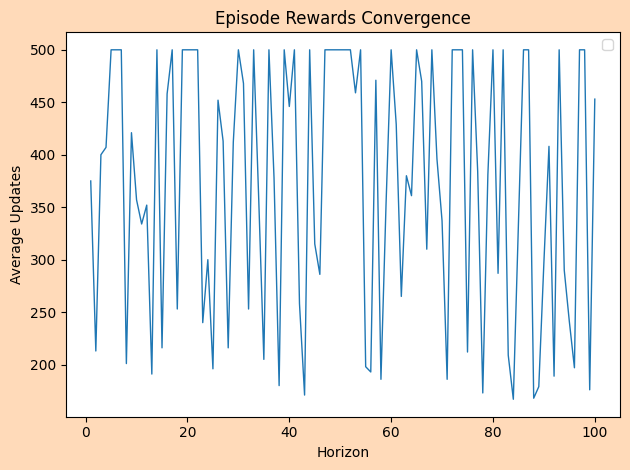

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


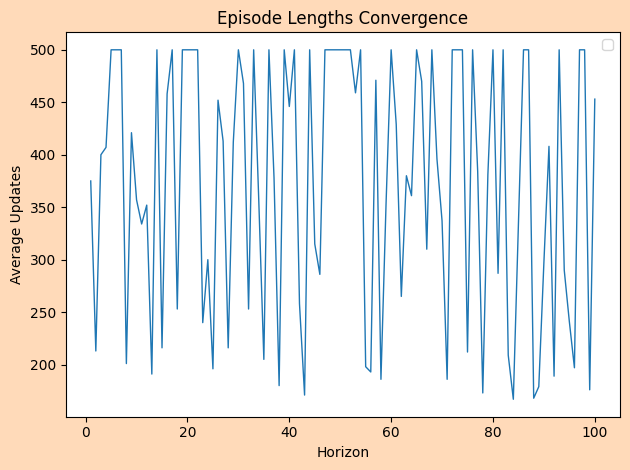

: 

In [6]:
try:
    model = train(env, model, train_timesteps=10_000, test_timesteps=1000, save_name='ppo_cartpole')
finally:
    # env.render(close=True)
    env.close()